# Lecture 5: Monte Carlo Simulation

## Introduction

Monte carlo simulation: 

* one of the most important and widely used numerical methods in scientific computing
* invented in the 40s by [Stanislaw Ulam](https://en.wikipedia.org/wiki/Stanislaw_Ulam)
  * first used in Manhattan project, then for the development of Hydrogen bomb
* widely used in quantitative finance, more popular recently with the rise of GPUs

## Main Idea

Monte Carlo (MC) methods have many applications. Consider a random phenomenum producing a result in $\mathbb{R}$ for simplicity. We usually use the formalism of defining a random space $(\Omega, \mathcal{F}, \mathbb{P})$ on which a random variable $X$ is defined and for possible (random) outcome $\omega \in \Omega$, we have $X(\omega) \in \mathbb{R}$ is the result of a random experiment.

As the name suggests, MC simulations techniques aim at producing many possible values $X(\omega)$.

In derivatives pricing for instance (but not only), we are often interested in computing (conditional) expectations $E(X)$. If one can simulate *i.i.d.* values $X_1, ..., X_N$ where the numbers are statistically generated and follow the distribution of $X$, one has the famous law of large numbers:
$$ \lim_{N\to +\infty} \frac{1}{N} \sum_{i=1}^N X_i \to E(X)$$

where the expectation converges almost surely and in $L_1$. A usual form of application is where $X = g(Y)$ and one simulates the variable $Y$. If $Y$ has a density $f_Y$, we can write:
$$ E(g(Y)) = \int g(y) f_Y(y) dy \sim \frac{1}{N} \sum_{i=1}^N g(Y_i)$$

In the RHS above, the knowledge of the density function is hidden in the simulation technique used to produce the numbers $Y_i$. This is what makes the MC simulation work.

One can think of many other applications. For instance, imagine you need to compute $ \int f(x) dx $ on some interval (finite or not). It is often quite easy to find a nice function $h > 0$ such that $\int h(x) dx =1$. Such a function can be then seen as a density function let's say for a random variable $X$ and therefore if we can numerically simulate $X$, we get:
$$ \int f(x) dx = \int f(x) h(x) dx = E\left( f(X) \right) \sim  \frac{1}{N} \sum_{i=1}^N f(X_i)$$

If the interval is finite, $\int_a^b f(x) dx$ choosing $h(x) = 1/(b-a)$ amounts to simulating uniform random variables over the interval $[a, b]$ (or $(a,b)$).

The main advantage of MC techniques is that, although their convergence rate is usually slow, they still converge at the same rate as the dimension increases and the cost of calculations grows only linearly.

As we will see, MC techniques are also very powerful in computing numerical approximaiton for ellitpic PDEs.

## Simulating (Pseudo) Random Numbers and Additional Material

See the reading packet on Brightspace.

## Why Monte Carlo?

The MC example of $\pi$ is really solving the integral of: 

$$\int_0^1\sqrt{1-x^2}dx = \frac{\pi}{4}$$

* But, MC is inefficient, it only converges at $\propto \frac{1}{\sqrt{n}}$
* In comparison, the Simpson rule converges at $\propto \frac{1}{n^4}$

However, MC shines because its convergence is dimension independent:

| Dimension | Simpson Integration Points | Equivalent MC samples | Cost Ratio (MC/Simpson) |
| :----: | :----: | :----: | :----: |
| 1 | $10$ | $10^{8} $ | $10^{7}$ |
| 5 | $10^5$ | $10^{8}$ | $1000$ |
| 10 | $10^{10}$ | $10^{8}$ | $0.01$ |
| 20 | $10^{20}$ | $10^{8}$ | $10^{-12}$ |

## Curse of dimensionality

In Finance, we routinely run into very high dimensions, since every source of randomness is a separate dimension:

* interest rate: SOFR models 3M forwards up to 30Y
* basket options: often have tens of names
* synthetic CDOs: hundreds of issuers in the portfolio
* mortgage securities: monthly payments up to 30 years

Most numerical methods fail when the number of dimensions is large
* PDE: 4 dimensions is the practical limit
* Tree: rarely more than 3 dimensions

## Advantages of Monte Carlo

There are good reasons why Monte Carlo is widely used in quant finance:

* dimensionality independent
* generic: widely applicable
* robust: can handle complicated payoff
* easy to implement and modify
* precise error estimate
* easy to add more samples on the fly
* can be made very fast for many problems
* often used to test more advanced pricing technique, like PDE

## $\mathbb{Q}$ measure applications

#### Derivative pricing:
$$ \frac{v(t_0)}{m(t_0)} = \mathbb{E}^\mathbb{Q}\left[\frac{v(t)}{m(t)} \bigg| \mathcal{F}_{t_0}\right] $$
* $m(t)$ is a numeraire security, $\mathbb{Q}$ is the measure induced by the numeraire $m(t)$
* Often used for pricing high dimensional exotic and path dependent derivatives

#### [XVA adjustments](https://corporatefinanceinstitute.com/resources/knowledge/valuation/xva-x-value-adjustment/#:~:text=XVA%2C%20or%20X%2DValue%20Adjustment,adjustments%20relating%20to%20derivative%20contracts.&text=When%20initiating%20new%20trades%20in,the%20pricing%20of%20derivative%20instruments): CVA/FVA/DVA/KVA/MVA
* The XVAs are a family of adjustments that can be made to the price of a derivatives trade, reflecting counterparty risk (CVA), own-default risk (DVA), funding (FVA), capital (KVA) and margin (MVA).
* an  active research area
* XVAs can be expressed in expectations


## $\mathbb{P}$ measure applications

#### Market Risk
* Value at Risk: $\mathbb{P}[v(T) < \text{VaR}_\alpha] = \mathbb{E}_t[(v(T) < \text{VaR}_\alpha)] = \alpha$

#### Counterparty credit risk: 
* EE (expected exposure): $e_t = \mathbb{E}[\max(v_t, 0)] = \mathbb{E}[v_t (v_t > 0)]$ 
* PFE (potential future exposure): $\mathbb{P}[v_t (v_t > 0) < \text{PFE}_\alpha] = \alpha$

#### Capital allocation
* a new area where the MC methods are successfully applied

#### Machine Learning
* MCMC methods
* Reinforcement learning (so as to simulate the environment). In the context of pricing, it's still under $\mathbb{Q}$

# Simulation of Stochastic Processes

In this section, we review the basic techniques to simulate stochastic processes of the form
$$ dX_t = \mu(t,X_t) dt + \sigma(t,X_t) dW_t $$

where $W_t$ is a standard Brownian motion. 

Simulating a stochastic process on an interval $[0,T]$ means that we can simulate the process $(X_t)_{t\in[0,T]}$ at discrete times $0=t_0 < t_1 < ... < t_N = T$ with corresponding values $X_{t_0}, X_{t_1},...,X_T$.

## Examples of Exact Simulation

Simulating *exactly*  a stochastic process means that there is no discretization error (see below). For instance, a standard Brownian motion can be simulated by setting $W_0 = 0$ and $W_{t_{n+1}} = W_{t_n} + \sqrt{t_{n+1} - t_n} Z_n$ where $Z_n \sim \mathcal{N}(0,1)$ is an iid sequence of Gaussian variables.

In general, a centered Gaussian process $X_t$ with covariance function $E(X_t X_s) = c(t,s)$ can be simulated exactly by computing the Cholesky decomposition of the matrix $c(t_i, t_j)$ and then simulating a full path $X_{t_1},...,X_{t_N}$ at once from a vector $Z_1,...,Z_N$. This is, in general, computationally too expensive and approximation methods are needed.

We will note $\Delta t_n = t_{n+1} - t_n$ which usually will be equal to $\frac{T}{N}$ for some large $N$ and similarly $\Delta W_{t_n} = W_{t_{n+1}} - W_{t_n}$.

### Brownian Motion with Drift
Simulating a Brownian motion with drift:
$$ dX_t = \mu dt + \sigma dW_t $$

can be done exactly as:
$$ X_{t_{n+1}} = X_{t_n} + \mu \Delta t_n + \sigma \Delta W_{t_n} $$ 

If the coefficients are deterministically time dependent, then
$$ X_{t_{n+1}} = X_{t_n} + \int_{t_n}^{t_{n+1}}\mu(t) dt  + \int_{t_n}^{t_{n+1}}\sigma(t) dW_t $$ 

In this case, simulation is exact if we can compute the integrals $\int_{t_n}^{t_{n+1}}\mu(t) dt $ and $ \int_{t_n}^{t_{n+1}}\sigma^2(t) dt$ since the variables $\int_{t_n}^{t_{n+1}}\sigma(t) dW_t$ are independent on non-overlapping sub-intervals and $\int_{t_n}^{t_{n+1}}\sigma(t) dW_t \sim \sqrt{\int_{t_n}^{t_{n+1}}\sigma^2(t) dt} Z_n$.

### GBM
The geometric Brownian motion
$$ dX_t = X_t(\mu dt + \sigma dW_t) $$

can be simulated exactly since
$$ X_{t_{n+1}} = X_{t_n} e^{\left(\mu-\frac{1}{2} \sigma^2 \right)\Delta t_n + \sigma \Delta W_{t_n}} $$

### OU process
An [Ornstein Uhlenbeck](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) process is a Gaussian process driven by an SDE of the form
$$ dX_t = k(\theta - X_t) dt + \sigma dW_t $$

One easily verifies that 
$$ X_{t+h}e^{k(t+h)} = X_{t}e^{kt} + \theta (e^{kt} -1) + \int_t^{t+h} \sigma e^{ku} dW_u  $$ 

Hence
$$ X_{t+h} \sim X_{t}e^{-kh} + \theta (1 -e^{-kh}) +  e^{-k(t+h)} \sqrt{ \int_t^{t+h} \sigma^2 e^{2ku}du}  Z_t  $$ 
$$ X_{t+h} \sim X_{t}e^{-kh} + \theta (1 -e^{-kh}) + \sigma  \sqrt{\frac{1-e^{2kh}}{2k}}  Z_t  $$ 

<div class="alert alert-block alert-info">
In general, if the distribution of $X_{t_{n+1}} | X_{t_n}$ is known, then the simulation can be exact.
</div>

## Simulation of a Linear SDE

Let's consider the SDE
$$ dX_t = k(\theta - X_t)dt + \sigma X_t dW_t $$

Noting $Y_t = e^{-\left(k+\frac{1}{2}\right)t + \sigma W_t}$ the solution of $dY_t = Y_t( -kdt + \sigma dW_t)$ with $Y_0 = 1$, then one can see that 
$$ X_t = Y_t \left(X_0 + k \theta \int_0^t Y^{-1}_u du \right) $$

Note that if $X_0, k, \theta > 0$ (which is a natural choice) then $X_t > 0$.

This gives
$$ X_{t+h} = Y_t e^{-\left(k+\frac{1}{2}\right)h + \sigma (W_{t+h} - W_t)} \left( \frac{X_t}{Y_t} + k \theta \int_t^{t+h} Y^{-1}_u du\right)$$
or
$$ X_{t+h} = e^{-\left(k+\frac{1}{2}\right)h + \sigma (W_{t+h} - W_t)} \left( X_t + k \theta Y_t \int_t^{t+h} Y^{-1}_u du\right) $$

and then one is left with computing $ Y_t \int_t^{t+h} Y^{-1}_u du $, but since $Y_t$ can be exactly simulated, this is a matter of time performance trade-off depending how much precision is desired.

This type of processes is used to model stochastic volatility (see for instance this [paper](https://arxiv.org/abs/1507.02847))


# Extending to Multiple Dimensions


When we want to extend a Monte-Carlo simulation to correlated assets, we need to construct the paths of the assets in a manner that captures the desired correlation structure. 

For two assets, this is fairly straightforward.
We want to generate a random variable $X$ that is multivariate normal with a mean vector $\mu$ and a covariance $\Sigma$:

$$
\mu = 
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
\text{  and  } \Sigma =
\begin{pmatrix}
\sigma_{1,1} & \sigma_{1,2} \\
\sigma_{2,1} & \sigma_{2,2}
\end{pmatrix} =
\begin{pmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_2 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2
\end{pmatrix}
$$

If we generate a pair of independent $N(0,1)$ random variables $N_1$ and $N_2$, we can express $X_1$ as:
$$X_1 = \mu_1 + \sigma_1 N_1$$
and write $X_2$ as: $$X_2 = \mu_2 + a N_1 + b N_2 $$
Since $N_1$ is independent of $N_2$,
$$\text{Var} (X_2) = \mathbb{E} [(X_2 - \mu_2)^2] = a^2 + b^2 = \sigma_2^2 $$
Also,
$$\text{Cov} (X_1 , X_2) = \mathbb{E} [(X_1 - \mu_1)(X_2 - \mu_2)] = a\sigma_1 - \rho \sigma_1 \sigma_2 $$


Solving these two equations, we get
$$ a = \rho \sigma_2 \text{    and    } b = \sqrt{(1-\rho^2)}\sigma_2 $$

Or

$$
\begin{pmatrix}
X_1 \\
X_2
\end{pmatrix}
=
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
+
\begin{pmatrix}
\sigma_1 & 0 \\
\rho \sigma_2  &  \sqrt{(1-\rho^2)}\sigma_2
\end{pmatrix}
$$

Or, in matrix notation $X = \mu + LN$, where $L$ is lower triangular.

This leads us to the precise method for developing a multi-dimensional simulation with correlated assets.

Suppose we have a correlation matrix $C$:
$$
C =
\begin{pmatrix}
1 & \rho_{1,2} & \cdots & \rho_{1,n} \\
\rho_{2,1} & 1 & \cdots & \rho_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\rho_{n,1} & \rho_{n,2} & \cdots & 1
\end{pmatrix}
$$

where $\rho_{i,j}$ represents the correlation of the $i^{\text{th}}$ and $j^{\text{th}}$ asset. Remember that $C$ is symmetric and positive definite.

The procedure for generating correlated random variables is:
1. Perform a Cholesky decomposition of the correlation matrix $C$ to obtain a lower triangular matrix $L$.
2. Generate a random matrix $X$ of size\[number of paths, number of assets\] distributed $N(0,I)$.
3. Obtain a correlated random matrix $Z = X L^T$.

Let's look at an example with 5 stocks:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

seed = 2323

In [2]:
# Start with a correlation matrix
C = np.array([
    [1.0000000000000000, 0.6971648047240692, 0.7384565370708003, 0.6798703149875049, 0.6815233837805931],
    [0.6971648047240692, 1.0000000000000000, 0.8388918757956443, 0.7516701327272224, 0.7668565257541257],
    [0.7384565370708003, 0.8388918757956443, 1.0000000000000000, 0.8522010326073503, 0.7624155054902461],
    [0.6798703149875049, 0.7516701327272224, 0.8522010326073503, 1.0000000000000000, 0.8029761601663761],
    [0.6815233837805931, 0.7668565257541257, 0.7624155054902461, 0.8029761601663761, 1.0000000000000000]
])

In [3]:
# Perform Cholesky decomposition on correlation matrix
L = np.linalg.cholesky(C)

# As a test, reconstruct correlation matrix from factorization (only for validation)
print(np.dot(L, L.T))

[[1.         0.6971648  0.73845654 0.67987031 0.68152338]
 [0.6971648  1.         0.83889188 0.75167013 0.76685653]
 [0.73845654 0.83889188 1.         0.85220103 0.76241551]
 [0.67987031 0.75167013 0.85220103 1.         0.80297616]
 [0.68152338 0.76685653 0.76241551 0.80297616 1.        ]]


In [4]:
def generate_z_Matrix(n_time_periods, n_securities, seed=42):
    '''
    Function for generating a matrix of normal random variables
    
    Inputs:
        n_time_periods: number of paths
        n_securities: number of securities
        
                
    Output: returns a normalized matrix of normal random variables
        matrix is (M x N), where M = number of time periods and
        N = number of securities
    
    RRL February 22, 2022
    
    '''

    import numpy as np
    np.random.seed(seed)
    
    z1 = np.random.normal(size=n_time_periods*n_securities) # get the right number of rv's
    z1 = (z1 - z1.mean())/z1.std() # normalize so they are N(0,1)
    z_matrix = z1.reshape(n_time_periods,n_securities) # reshape to proper dimension
    
    return z_matrix

In [5]:
# Generate the random matrix
X = generate_z_Matrix(1000000,5)

In [6]:
# Obtain the time series with proper correlations
Z = X @ L.T

In [7]:
# Test to see if we have the proper correlations
print(np.corrcoef(Z.T))

[[1.         0.69711133 0.73861317 0.6800266  0.6815382 ]
 [0.69711133 1.         0.83872786 0.75159668 0.76691707]
 [0.73861317 0.83872786 1.         0.85198817 0.76188273]
 [0.6800266  0.75159668 0.85198817 1.         0.80267369]
 [0.6815382  0.76691707 0.76188273 0.80267369 1.        ]]


# Improving Monte-Carlo Simulations



## Background
Generally speaking, we compute the price of a claim $V[S(0),0]$ as

$$
V[S(0),0] = e^{-rT} \mathbb{E}_0^{\mathbb{Q}}[V(S(T),T]
$$

the time 0 expectation under the risk-neutral measure $\mathbb{Q}$.

Monte-Carlo valuation exploits this idea. We *assume* that assets earn the risk-free rate and simulate their returns and average over all outcomes. 

Monte-Carlo  valuation depends critically on risk-neutral valuation.

It is important to recognize that Monte-Carlo valuation is form of numerical integration, making it useful for a wide variety of problems.

### A Simple Example
Consider the valuation of a European call option. The payoff at time $T$ is a function of the stock price $S_T$. Representing the payoff as $V(S_T,T)$, the time-zero Monte-Carlo price is given by:

$$
V(S_0,0) = \frac{1}{n} e^{-rT} \sum_{i=1}^n V(S_T^i,T)
$$

where $S_T^1,\dots,S_T^n$ are $n$ randomly drawn time-T stock prices. And, for a call option $V(S_T^i,T) = \max [S_T^i-K,0]$

We generate random standard normal variables, $Z_i$, and, from those, generate random future stock prices, computing the value of the call as:

$$
\max[S_T^i - K, 0] = \max [S_0 e^{(r-0.5 \sigma^2)T  + \sigma \sqrt{T} Z_i} - K, 0]\,; \;\; i = 1,\dots,N
$$

average across the values:

$$
\frac{1}{N} \sum_{i=1}^N \max[S_T^i -K, 0]
$$

and discount that average back at the risk-free rate to get the estimate of the option value:

$$
C = e^{-rT} \frac{1}{N} \sum_{i=1}^N \max[S_T^i -K, 0]
$$

In [8]:
def mc_EuroCall(S_0,K,T,r,sigma,N,M):
    '''
    Monte Carlo Simulation for pricing a European Call option.
    
    Inputs:
        S_0: intial stock price
        K: strike price
        T: time to  maturity in years
        r: riskless interest rate
        sigma: volatility of the stock price
        N: the number of iterations to run
        M: the number of time-steps
        
    Output: Prints the European Call Value
    
    RRL March 23, 2021: adapted from Hilpisch "Python for Finance" 
    '''
    import numpy as np
    np.random.seed(seed) 
    dt = T / M

    # Simulating N paths with M time steps
    S = S_0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
        + sigma * np.sqrt(dt)
                * np.random.standard_normal((M + 1, N)), axis=0))

    # Calculating the Monte Carlo estimator
    C0 = np.exp(-r * T) * sum(np.maximum(S[-1] - K, 0)) / N
    
    return C0

In [9]:
C0 = mc_EuroCall(40, 40, 0.5, 0.08, 0.3, 500000, 100)
print(f'European Call Value from MC: ${C0:2.4}')

European Call Value from MC: $4.191


Of course there is no reason to value a European call by Monte-Carlo, but it allows us to see the accuracy of the Monte-Carlo valuation for something that we can value analytically. 

In [10]:
def BlackScholes(CallPutFlag,S_0,K,T,r,div,sigma):
    '''
    Black-Scholes price for a European option.
    
    Inputs:
        CallPutFlag: 'c' or 'p' for call or put
        S_0: intial stock price
        K: strike price
        T: time to  maturity in years
        r: riskless interest rate
        div: continuous dividend on stock
        sigma: volatility of the stock price
        
    Output: returns the European Call or Put Value
    
    RRL March 23, 2021: adapted from Ying & Mokaya "Implementing the Black
                                            Scholes in Python" 
    '''

    from scipy.stats import norm
    import numpy as np
    d1 = (np.log(S_0/K)+((r-div)+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    if CallPutFlag=='c':
        return S_0*np.exp(-div*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2)-S_0*np.exp(-div*T)*norm.cdf(-d1)

In [11]:
BS = BlackScholes('c', 40, 40, 0.5, 0.08, 0, 0.3)
print(f'European Call Value from BS: ${BS:2.4}')

European Call Value from BS: $4.155


What do you think explains this difference?

### Efficiency

To assess the accuracy of our Monte-Carlo estimate, we can run the simulation a number of times and see how much variability there is in the results. In this case, we know the true value (at least according to the Black-Scholes equation). But what if we don't?

Let $\sigma_C$ denote the standard deviation of one draw and $\sigma_N$ the standard deviation of $N$ draws. The standard error of the mean with iid $S_i$ is:

$$
\sigma_n = \frac{1}{\sqrt{N}} \sigma_C
$$

The standard error of the Monte-Carlo estimate is inversely proportional to the square root of the number of draws.

Importantly, the error convergence rate is independent of the dimension of the problem and only depends on the number of sample paths generated. This makes Monte-Carlo attractive compared to other methods of numerical integration as the dimension of the problem increases. The increased complexity of derivative securities in recent years has led to the need to evaluate high-dimensional integrals. If the problem involves the integral of a function $f(x)$ over a d-dimensional unit hypercube, the simple Monte-Carlo estimate is the the average of the function over $N$ points selected at random from the unit hypercube.

### Selecting Sequences
Assume that we have two iid sequences $Y_{1i}$ and $Y_{2i}$ where $\mathbb{E}[Y_{1i}] = \mathbb{E}[Y_{2i}]$ and $\text{Var}[Y_{1,i}] = \sigma_1^2$ and $\text{Var}[Y_{2,i}] = \sigma_2^2$. Is $\frac{1}{n}\sum Y_{1i}$ or $\frac{1}{n}\sum Y_{2i}$ preferable?

If we assume that we have a fixed amount of computing time $\tau$ and the time that it takes to generate the two sequences is given by $\tau_1$ and $\tau_2$, then the number of replications of each sequence are the integer parts of $\frac{\tau}{\tau_1}$ and $\frac{\tau}{\tau_2}$, which gives us standard errors:

$$
\frac{\sigma_1}{\sqrt{\tau / \tau_1}}
\hspace{0.5 in} \text{and}
\hspace{0.5 in}
\frac{\sigma_2}{\sqrt{\tau / \tau_2}}
$$

It follows that the estimator $Y_{1i}, i=1, \dots, N$ is preferred if:

$$
\sigma_1^2 \tau_1 \lt \sigma_2^2 \tau_2
$$

The product of variance and per-sample computing time is known as the *efficiency* of the Monte-Carlo estimator and is the preferred measure of comparison between estimators.

**Note**: It is not all about the variance of the estimator, a high variance estimator may be preferable to a low variance estimator if it takes less time to compute.

### Generating Sequences of Random Variables

As mentioned in the reading packet, a standard approach is to generate a sequence of random variables from a uniform distribution, $U_i, i=1,\dots N$ and then use an inverse transform to "convert" the uniform random variables into random variables from the desired distribution.

$$
Z_i = F^{-1}(U_i)
$$

Many distributions have a closed form inversion, for example, the Exponential:

$$
F(x) = 1-e^{-\lambda x} \implies F^{-1}(U) = - \frac{\ln (1- U)}{\lambda} 
$$
$$
\lambda \gt 0
$$

and the Cauchy:

$$
F(x) = \frac{1}{2} + \frac{1}{\pi} \arctan (\frac{x - x_0}{\gamma}) \implies F^{-1}(U) = x_0 + \gamma \tan[\pi\,(U-\tfrac{1}{2})],
$$
$$
x_0 \gt 0\,, \gamma\gt 0
$$

But for the Normal distribution, there is no closed form inversion. (See code for approximating the inversion at the end of the reading packet.)

### When do You Use Monte-Carlo?

In practice, Monte-Carlo valuation is useful where:
* The number of random elements in the valuation problem is too great to permit a direct numerical solution.
* The underlying variables are distributed in a way that makes direct solutions difficult (*e.g.* when returns are a mixture of continuous and jump processes).
* The claims are path dependent.
* It is necessary to validate the solution from another technique.


### Drawbacks to Monte-Carlo

It is slow, especially with what we have been describing (known as "naive" or "simple" Monte-Carlo. Generally, on the order of $O(N^{-\tfrac{1}{2}})$.

Which brings us to the point of today's lecture...

# Variance Reduction

How can we improve Monte-Carlo valuation? Two basic approaches:
* Reduce the variance of the estimator.
* Improve the estimate of the expected value.

These approaches are collectively known as **variance reduction** techniques and the most common are:
* Antithetic variates 
* Control variates
* Stratified sampling
* Importance sampling
* Density formulation
* Moment matching
* Low-discrepancy sequences

Variance reduction is extremely important in practice:
* Monte Carlo is often applied to exotic, complex and large scale problems, speed is the critical bottleneck
* Variance reduction techniques can lead to significant speedup of the calculations

## Antithetic Variates
The simplest and most easily implemented of variance reduction techniques is *antithetic variates*. The primary idea behind this technique is that for every simulated realization, there is an opposite and equally likely realization. 
* This technique works best if the function is approximately linear -- specifically,the simulation output needs to depend monotonically on the input of the random numbers.
* Antithetic variates can always be expected to lower the standard error, but it is not necessarily more efficient than regular Monte-Carlo.
* It is often easier to apply since it concentrates on the procedure used for generating the random deviates. Essentially this technique relies on the introduction of negative correlation between two estimates.

$\newcommand{\var}{\operatorname{Var}}$
$\newcommand{\cov}{\operatorname{cov}}$
$\newcommand{\bs}{\mathbf}$

Suppose $\tilde x(\bs w(t))$ is driven by an multi-dimensional Brownian motion $\bs w(t)$, 

$$\tilde y = \frac{1}{2} \left(\tilde x\left(\bs w\left(t\right)\right) + \tilde x\left(-\bs w\left(t\right)\right)\right) $$

* $\tilde y$ is the average of two $\tilde x$ from mirroring Brownian paths
* $\mathbb{E}[\tilde y] = \mathbb{E}[\tilde x]$ (the mirror of a Brownian path is also a Brownian)
* $\var[\tilde y] = \frac{\sigma^2}{2}\left(1 + \rho\left(\tilde x\left(\bs w\right),\tilde x\left(-\bs w\right)\right)\right)$

Effectiveness depends on the payoff:
* the cost of every sample doubled, *i.e.*, $c(\tilde y) = 2c(\tilde x)\;\;\;$ Why?
* to ensure an overall saving in computational cost:
$$ \var[\tilde y] < \frac{\sigma^2}{2}  \iff \rho\left(\tilde x\left(\bs w\right),\tilde x\left(-\bs w\right)\right)< 0 $$

The antithetic variates technique is often abused in practice
* it is very easy to implement, often used without a cost/benefit analysis
* having perfect negative correlation does not hold for the corresponding transformed lognormal variates. While the covariance term is negative its magnitude is not generally large enough to effect a significant reduction in the variance of the revised estimate.
* it conflicts with other variance reduction techniques
* there are only modest benefits from this technique in finance



## Control Variates

It is better to be precisely wrong than roughly right

<img src=accurate-precise.jpg width=800>

The primary idea is that there may be random variables "close" the random variable (or process) we are trying to estimate and that we may be able to use those random variables to improve our estimate.
* Simply put, the principle is to **"use what you know"**.

### Motivation

Exotic instruments are often 90% vanilla, with a small exotic feature
* In those cases, the vanilla instrument is often a good proxy to the exotic instrument
* Our motivating example will be an Asian option vs. vanilla European option
  * Asian option is path-dependent and its payoff is computed from average prices.
  * Asian options have lower prices than standard options due to lower volatility
  * There are 8 kinds of Asian options:
      * Arithmetic average of either the asset price or the strike price (2 kinds)
      * Geometric average of either the asset price or the strike price (2 kinds)
      * Calls and puts
          * standard call: $\max[S_t-K, 0]$; standard put: $\max[K-S_T, 0]$
          * average price call: $\max[S_{avg}-K, 0]$; average price put: $\max[K-S_{avg}, 0]$
          * average strike call: $\max[S_T -S_{avg}, 0]$; average strike put: $\max[S_{avg} - S_T, 0]$

  * Most common arithmetic asset price options (rare that any other is traded)


Using the asset that we can price easily (usually with a closed form solution) to price what is essentially the (exotic - vanilla) instead of the full exotic instrument:
* the difference has much smaller variance
* we can recover the exotic trade's price by adding back the price of vanilla trade 




### Formalizing

Expressing the idea formally, consider the difference:

$$ \tilde y = \tilde x + \beta\, (v - \tilde v) $$

* $\tilde v$ is the control variate, which represents a vanilla instrument (we shall see that want this to be as similar as possible to the asset we want to price)
* $v = \mathbb{E}[\tilde v]$ is the true value of the vanilla instrument, which is known to very high precision (*e.g.* analytical or PDE)
* $\beta$ is a scalar constant, a free parameter
* Note that $\mathbb{E}[\tilde y] = \mathbb{E}[\tilde x]$ by construction


We choose the optimal $\beta$ by minimizing $\tilde y$'s variance: 



$$\begin{array}{l} \var[\tilde y] &= \cov(\tilde y, \tilde y) = \cov(\tilde x -\beta \tilde v, \tilde x -\beta \tilde v) \\
&= \sigma_x^2 - 2\, \beta \,\cov(\tilde x, \tilde v) + \beta^2 \sigma_v^2  \\
\frac{\partial \var[\tilde y]}{\partial \beta} &= -2\, \cov(\tilde x, \tilde v) + 2\,\beta \sigma_v^2 = 0 \\
\beta^* &= \frac{\cov(\tilde x, \tilde v)}{\sigma_v^2} = \frac{\rho(\tilde x, \tilde v)\sigma_x}{\sigma_v}
\end{array}$$

The minimum variance is therefore: $\var[\tilde y] = \sigma_x^2\left(1-\rho^2(\tilde x, \tilde v)\right)$
* In general, the variance of the control variate estimate will be less than naive Monte-Carlo
* If $\beta$ is optimally chosen, it is never worse than naive Monte-Carlo
* The higher the correlation between $\tilde x,\, \tilde v$, the greater the variance reduction
* We can achieve a significant performance gain with the choice of the right control variate
* $\tilde x, \, \tilde v$ must be driven by the same Brownian paths to ensure high correlation
* One can also estimate $\beta^*$ by running a small number of Monte-Carlo simulations and then run a regression on the difference equation above

**Note**: The optimal value of $\beta$ varies depending on the application.

### Example: Asian option

Consider the following Asian call option:
* $s(0) = 100, k=100, \sigma = .25$, maturity $t_m = 1 \text{yr}$
* constant continuous risk free rate of $r=0.02$
* payoff at maturity is based on monthly average of stock prices: 
$$\left(\frac{1}{n}\sum_{i=1}^{n} s(i\delta) - k\right)^+$$
with $\delta = \frac{1}{12}, \, n=\frac{t_m}{\delta} = 12$

A straight Monte Carlo simulation of 100,000 paths yields:

In [12]:
# A couple of "helper" functions

def generate_z(n_paths, dt, t_maturity):
    '''
    Function for generating a matrix of normal random variables
    
    Inputs:
        n_paths: number of paths
        dt: the size of the time steps
        t_maturity: time to maturity
                
    Output: returns a normalized matrix of normal random variables
        matrix is (M X N), where M = number of paths and
        N = number of time steps
    
    RRL February 22, 2022
    
    '''

    import numpy as np
    np.random.seed(seed)
    n_time_steps = int(t_maturity/dt + 1e-6)
    z1 = np.random.normal(size=n_paths*n_time_steps) # get the right number of rv's
    z1 = (z1 - z1.mean())/z1.std() # normalize so they are N(0,1)
    z_matrix = z1.reshape(n_paths,n_time_steps) # reshape to proper dimension
    
    return z_matrix

###########################################################################################

def GBM(z, x0, r, sigma, dt):
    '''
    Function for generating an array of stock prices from 
    Geometric Brownian Motion under a Q-measure
    
    Inputs:
        z: a matrix of normal rv's [number of paths, number of time steps]
        x0: Stock price at time 0
        r: the risk-free rate
        sigma: the volatility
        dt: the size of the time-steps
        
    Output: returns an array of prices with size = [number of paths, number of time steps]
    
    RRL February 22, 2022
    
    '''
    
    import numpy as np
    x_s = []
    x = np.ones(len(z)) * np.log(x0)
    for e in z.T:
        x = x + (r - 0.5 * sigma * sigma) * dt + sigma * e * np.sqrt(dt)
        x_s.append(x)

    return np.exp(np.array(x_s).T)

###########################################################################################

In [13]:
def MC_Asian(n_paths, z, x0, r, sigma, dt, t_maturity):
    '''
    Function for Monte-Carlo simulation of Asian call under Q-measure
    
    Inputs:
        n_paths: number of paths
        z: a matrix of normal rv's [number of paths, number of time steps]
        x0: Stock price at time 0
        r: the risk-free rate
        sigma: the volatility
        dt: the size of the time-steps
        t_maturity: time to maturity
        
        
    Output: returns the mean of the MC simulation and the error
    
    RRL February 22, 2022
    
    '''

    import numpy as np
    ss = GBM(z, x0, r, sigma, dt)
    x = np.maximum(np.mean(ss, 1) - k, 0) * np.exp(-r*t_maturity) # simulated Asian call value
    return np.mean(x), np.sqrt(np.var(x)/n_paths) # mean and error

In [14]:
# set the values of the parameters for the MC
x0, k, sigma, t_maturity, dt, r, n_paths = 100., 100., .25, 1., 1./12, 0.02, 100000
z = generate_z(n_paths, dt, t_maturity)


# Compute the value and error of an Asian call using Monte-Carlo
tic = time.time()
A_call, A_error = MC_Asian(n_paths, z, x0, r, sigma, dt, t_maturity) 
t1 = time.time() - tic

df = pd.DataFrame([n_paths, A_call, A_error], index=['Paths', 'Value', 'MC error'], columns=['Asian Call'])
display(df.T)

,Paths,Value,MC error
Asian Call,100000.0,6.560034,0.03234


### European option as control variate

We can use the European call option with the same strike and maturity as control


In [15]:
BS = BlackScholes('c', x0, k, t_maturity, r, 0, sigma) # dividend = 0
number_time_steps = int(t_maturity/dt + 1e-6)
C_0 = mc_EuroCall(x0, k, t_maturity, r, sigma, n_paths, number_time_steps)

print(f'European Call Value from BS: ${BS:2.4}')
print(f'European Call Value from MC: ${C0:2.4}')
print(f'Asian Call Value from MC: ${A_call:2.4}')

European Call Value from BS: $10.87
European Call Value from MC: $4.191
Asian Call Value from MC: $6.56


In [16]:
def Asian_MC_cv1(x0, k, t_maturity, r, sigma, dt, n_paths):
    '''
    Function using European call option (BS and MC) as a control variate for an
    Arithmetic Asian call
    
    Inputs:
        x0: Stock price at time 0
        k: strike price
        t_maturity: time to maturity
        r: risk-free interest rate
        sigma: volatility
        dt: size of the time steps
        n_paths: number of paths
        
    Output:
        MC Value of the Arithmetic Asian option at time 0 corrected by the control variate
        MC error in value
        MC value of the Arithmetic Asian option through time
        MC value of the European option through time
        rho: the correlation of the European and Asian MC values
        beta: the optimal beta "hedge"
        
    Original code: Yadong Li 2015 (https://github.com/yadongli/nyumath2048)
    Modified by RRL 2/23/2022
    
    '''
    BS = BlackScholes('c', x0, k, t_maturity, r, 0, sigma)
    z = generate_z(n_paths, dt, t_maturity)
    bm_series = GBM(z, x0, r, sigma, dt)
    
    asian_path = lambda bm_series: np.maximum(np.mean(bm_series, 1) - k, 0)*np.exp(-r*t_maturity) # for Asian arithmetic call
    european_path = lambda bm_series: np.maximum(bm_series[:,-1]-k,0)*np.exp(-r*t_maturity) # for European call
    
    rho = np.corrcoef(asian_path(bm_series),european_path(bm_series))[0,1] # correlation
    beta = rho*np.std(asian_path(bm_series))/np.std(european_path(bm_series)) # optimal beta
    
    y = asian_path(bm_series) + beta * (BS - european_path(bm_series))
    return np.mean(y), np.sqrt(np.var(y)/n_paths), asian_path(bm_series),\
        european_path(bm_series), rho, beta
    

In [17]:
tic = time.time()
cv1_result = Asian_MC_cv1(x0, k, t_maturity, r, sigma, dt, n_paths)
t2 = time.time() - tic
print(f'Arithmetic Asian Call Value: ${cv1_result[0]:2.4}')

Arithmetic Asian Call Value: $6.566


In [18]:
def plot_cv(cv, actual, t_MC_cv, n_paths, control) :
    '''
    Function to plot the values generated from the MC simulations for the Asian arithmetic
    call and the control variate
    
    Inputs:
        cv: the results of the Asian_MC_cv
        actual: the calculated speedup from the control variate technique
            the ratio of times (A_MC/A_MC_cv) multiplied by the square of the ratio of
            errors (A_MC/A_MC_cv)
        t_MC_cv: the time the MC with control variate takes
        n_paths: the number of paths for the MC
        control: the name of the control variate
        
    Output: a plot and results
    
    Original code: Yadong Li 2015 (https://github.com/yadongli/nyumath2048)
    Modified by RRL 2/23/2022
    
    '''
    u, e, x, v, rho, beta = cv # values computed 
    fig = plt.figure(figsize=[12, 4])
    plt.subplot(1, 2, 1)
    plt.plot(x[:1000], v[:1000], '.')

    plt.xlabel('Asian option payoff', fontsize=16)
    plt.ylabel(control, fontsize=16)
    plt.title('MC Asian vs. Control Variate', fontsize=18);

    ax = fig.add_subplot(1, 2, 2)

    ax.text(0, .75, "$\\rho=%.4f, \;\; \\beta^*=%.4f$" % (rho, beta), size="xx-large")
    ax.text(0, .63, "Speedup limit: $\\frac{1}{1-\\rho^2} =$ %.2f, actual: %.2f" % \
            (1./(1.-rho*rho), actual), size="xx-large")
    ax.text(0, .50, "Controlled MC valuation: %.3f $\\pm$ %.3f" % (u, e), size="xx-large")
    ax.text(0, .40, "%s paths took %.3g sec" % ("{:,}".format(n_paths), t_MC_cv), size="xx-large")

    ax.set_axis_off()

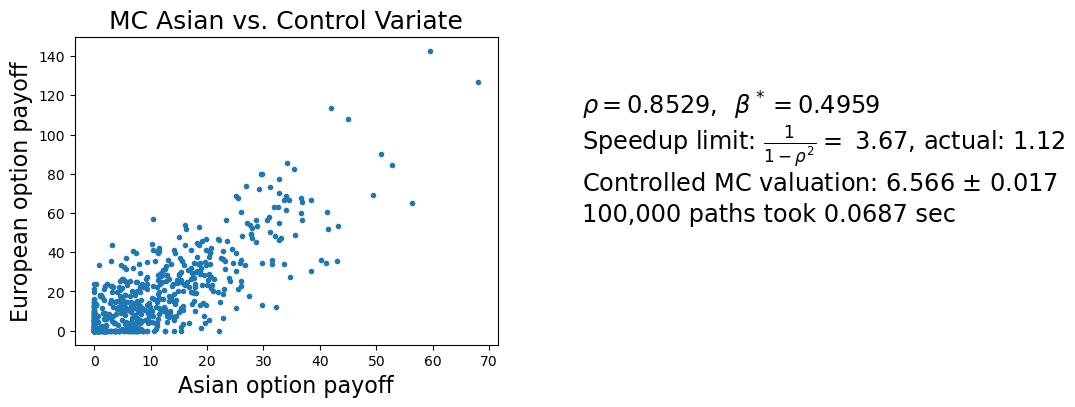

In [19]:
plot_cv(cv1_result,t1/t2*(A_error/cv1_result[1])**2, t2, n_paths, "European option payoff")

### Geometric Asian option as control variate

Now consider the geometric mean of the stock prices: 

$$ g = \exp\left(\sum_{i=1}^{n} \log\left(s\left(i\delta\right)\right)\right) $$

* $g$ follows a lognormal distribution with known mean and variance
* $g$ is a close approximation to the arithmetic mean

Consider a call option with the following payoff:

$$\left[g - k\right]^+$$

* This option can be priced exactly by Black-Scholes in closed form or through Monte-Carlo simulation
* It is not really a traded instrument, but that doesn't matter

Using the geometric Asian option control:

In [20]:
def Geometric_Asian(CallPutFlag,S_0,K,T,r,dt,sigma):
    '''
    Black-Scholes price for a Geometric Asian option.
    
    Inputs:
        CallPutFlag: 'c' or 'p' for call or put
        S_0: intial stock price
        K: strike price
        T: time to  maturity in years
        r: riskless interest rate
        dt: size of the time steps
        sigma: volatility of the stock price
        
    Output: returns the Geometric Asian Call or Put Value
    
    RRL March 23, 2021 
    '''

    from scipy.stats import norm
    import numpy as np
    n_time_steps = int(T/dt + 1e-6)
    print(f'BS Geometric Asian Call Value: ${A_call:2.4}')
    adj_sigma = sigma * np.sqrt((2 * (n_time_steps+1))/(6 * (n_time_steps+1)))
    rho = 0.5 * (r - 0.5*(sigma*sigma) + (adj_sigma*adj_sigma))
               
    d1 = (np.log(S_0/K) + (rho + 0.5 * adj_sigma*adj_sigma) * T)/(adj_sigma * np.sqrt(T))
    d2 = (np.log(S_0/K) + (rho - 0.5 * adj_sigma*adj_sigma) * T)/(adj_sigma * np.sqrt(T))
    if CallPutFlag=='c':
        return np.exp(-r*T)*(S_0*np.exp(rho*T)*norm.cdf(d1)-K*norm.cdf(d2))
    else:
        return np.exp(-r*T)*(K*norm.cdf(-d2)-S_0*np.exp(rho*T)*norm.cdf(-d1))

In [21]:
def Asian_MC_cv2(x0, k, t_maturity, r, sigma, dt, n_paths):
    '''
    Function using a Geometric Asian call option as a control variate for an
    Arithmetic Asian call
    
    Inputs:
        x0: Stock price at time 0
        k: strike price
        t_maturity: time to maturity
        r: risk-free interest rate
        sigma: volatility
        dt: size of the time steps
        n_paths: number of paths
        
    Output:
        MC Value of the Asian option at time 0 corrected by the control variate
        MC error in value
        MC value of the Arithmetic Asian option through time
        MC value of the Geometric Asian option through time
        rho: the correlation of the Arithmetic and  Geometric Asian MC values
        beta: the optimal beta "hedge"
        
    Original code: Yadong Li 2015 (https://github.com/yadongli/nyumath2048)
    Modified by RRL 2/23/2022
    
    '''
    GA = Geometric_Asian('c', x0, k, t_maturity, r, dt, sigma)
    
    z = generate_z(n_paths, dt, t_maturity)
    bm_series = GBM(z, x0, r, sigma, dt)
    
    asian_path_Arithmetic = lambda bm_series: np.maximum(np.mean(bm_series, 1) - k, 0)*np.exp(-r*t_maturity)
    asian_path_Geometric = lambda bm_series : np.maximum(np.exp(np.mean(np.log(bm_series), 1)) - k, 0)*np.exp(-r*t_maturity)
    
    rho = np.corrcoef(asian_path_Arithmetic(bm_series),asian_path_Geometric(bm_series))[0,1] # correlation
    beta = rho*np.std(asian_path_Arithmetic(bm_series))/np.std(asian_path_Geometric(bm_series)) # optimal beta
    
    y = asian_path_Arithmetic(bm_series) + beta * (GA - asian_path_Geometric(bm_series))
    return np.mean(y), np.sqrt(np.var(y)/n_paths), asian_path_Arithmetic(bm_series),\
        asian_path_Geometric(bm_series), rho, beta
    

In [22]:
tic = time.time()
cv2_result = Asian_MC_cv2(x0, k, t_maturity, r, sigma, dt, n_paths)
t3 = time.time() - tic
print(f'Arithmetic Asian Call Value: ${cv2_result[0]:2.4}')

BS Geometric Asian Call Value: $6.56
Arithmetic Asian Call Value: $6.164


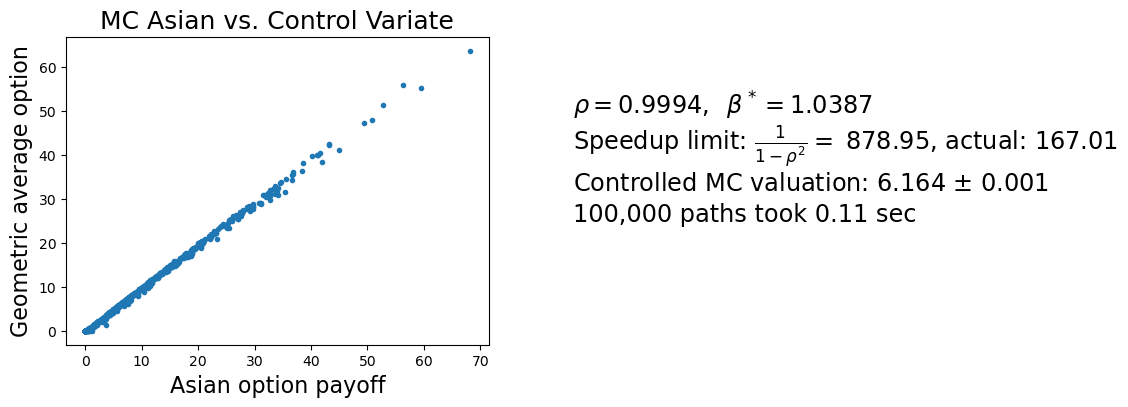

In [23]:
plot_cv(cv2_result, t1/t3*(A_error/cv2_result[1])**2, t3, n_paths, "Geometric average option")

**Disclaimer**: Such dramatic reduction in variance is not typical. A 10 to 20 times reduction is an excellent result in practice.

### Summary

Control variates represent the most potent variance reduction technique:
* It can increase speed by orders of magnitude
* The choice of control variate is critical, it is problem specific
* The selection of the appropriate control variate usually has two conflicting requirements:
    * The control variate must give rise to an integral that is easy to evaluate
    * The control variate must model the behavior of the function we are trying to estimate
* Implementation requires creativity and highly specialized skills

It can also be used to compute deltas with Monte Carlo simulation

## Importance Sampling

The primary idea associated with importance sampling is that an expectation under one probability measure can be expressed as an expectation under another probability measure. This relies on the use of a *likelihood ratio* or *Radon-Nikodym derivative*. In Monte-Carlo, the change of measure is used to try to obtain a more efficient estimator.

### Motivation: Extreme events

We often need to simulate rare or extreme events:

* CDS pricing: default event of high grade issuers
* CDO tranches: multiple defaults in a portfolio
* Extreme quantile measures: 
  * VaR: 99% 10 day
  * Incremental Risk Charge (IRC) or Comprehensive Risk Measure (CRM): 99.9% 1-year
  * Potential Future Exposure (PFE): 98%

Simulating rare events is very inefficient, because most simulated paths do not hit the area of interest. 

Importance sampling is used to make rare events less rare.

### Example: Lottery ticket

Consider buying a lottery ticket that pays $g = $ 1 billion, with the chance of winning being $p$:

The variance of the payoff is: 

$$\var[\tilde x] = \mathbb{E}[\tilde x^2] - \mathbb{E}[\tilde x]^2 = g^2(p - p^2)$$

If we want to price the payoff to a relative accuracy of 1% using Monte Carlo, then the minimum number of sample paths $n$ is:

$$ g \sqrt{\frac{p-p^2}{n}} < .01 g\cdot p \iff n > 10^4\frac{1-p}{p}$$

Giving us the relationship between $p$ and the computational costs:

In [24]:
p = np.array([1e-8, 1e-4, .01, .1, .5, .9, .99, 1-1e-4])
n = 1e4*(1-p)/p
df = pd.DataFrame(np.array([p, n]), index=["p", "Min Paths"])
df = df.T.set_index("p")
display(df.T)

p,1.000000e-08,1.000000e-04,1.000000e-02,1.000000e-01,5.000000e-01,9.000000e-01,9.900000e-01,9.999000e-01
Min Paths,1.000000e+12,99990000.0,990000.0,90000.0,10000.0,1111.111111,101.010101,1.0001


### Sampling extreme events

Consider the probability of winning the lottery $p=10^{-8}$:

- We can draw 10,000 Monte-Carlo sample paths and have none of them hit the positive payoff
- In which case, the average of the 10,000 paths gives incorrect value of 0. 
- But the Monte-Carlo error  estimated from the samples is $$\frac{\hat s}{\sqrt{n}} = 0$$

Why and how did the Monte-Carlo error estimation fail?

### The intuition behind importance sampling

Consider two lotteries:

1. $p=10^{-8}$ chance of winning \$1 billion 
2. $p=0.99$ chance of winning $10.10

The expected payoff is the same for the two lotteries.

Let's pretend that we are playing lottery \#2 for our Monte-Carlo simulation.

Everybody wins!

* sample mean is unchanged
* lottery \#2 has a much smaller variance and therefore much faster to compute

Basic Monte-Carlo sampling evaluates:

$$
\mathbb{E}_f [h(x)] = \int_N h(x)f(x)dx
$$

We can use another distribution $g(x)$, the *importance function* to write:

$$
\mathbb{E}_f [h(x)] = \int_N h(x)\frac{f(x)}{g(x)}g(x)dx = \mathbb{E}_g \left[ \frac{h(x)f(x)}{g(x)} \right]
$$

giving a new estimator:

$$
\tilde{h}_n = \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{g(x_i)}h(x_i)
$$

where $x_i$ is drawn from $g(\cdot)$. 

Conceptually, all the likelihood ratio $f(x_i)/g(x_i)$ does is provide an indicator for how important the sample $h(x_i)$ is for estimating $\tilde{h}_n$.

In finance, we think of this as a change of measure, which has implications beyond Monte-Carlo, but recognize that the change to a risk-neutral measure is **not** necessary for Monte-Carlo and requires somewhat stronger assumptions than the use of an importance function.

### Change of Measure

$$ \mathbb{E}^\mathbb{Q}\left[\tilde x\right] = \mathbb{E}^{\mathbb{P}}\left[\tilde x \frac{d \mathbb Q}{d \mathbb P}\right]$$
* $\mathbb{P}$ and $\mathbb{Q}$ must be equivalent (i.e., they have identical set of events with non-zero probability)
* $\frac{d \mathbb Q}{d \mathbb P}$ is the Radon-Nikodym derivative, $\mathbb{E}^{\mathbb P}\left[\frac{d \mathbb Q}{d \mathbb P}\right] = \mathbb{E}^\mathbb{Q}\left[1\right] = 1$


In one-dimension:

$$\begin{array}{l}
\mathbb{E}^\mathbb{Q}\left[\tilde x\right] = \int x q\,(x) dx = \int x \frac{q\,(x)}{p\,(x)} p\,(x) dx = \mathbb{E}^\mathbb{P}\left[\tilde x \frac{d \mathbb Q}{d \mathbb P}\right]
\end{array}$$

* $p\,(x), q\,(x)$ are the probability densities in the respective measures
* the distribution of $\tilde x$ under $\mathbb P$ and $\mathbb Q$ measures are **different**

### Sampling with a change of measure

Given the following equality,

$$ \mathbb{E}^\mathbb{Q}\left[\tilde x\right] = \mathbb{E}^{\mathbb{P}}\left[\tilde x \frac{d \mathbb Q}{d \mathbb P}\right]$$

We can compute $\mathbb{E}^{\mathbb Q}[\tilde x]$ one of the two ways:
1. sample $\tilde x$ from measure $\mathbb Q$ and compute $\frac{1}{n} \sum_i x_i$
2. sample $\tilde x$ from measure $\mathbb P$ and compute $\frac{1}{n} \sum_i (x_i \frac{d \mathbb Q}{d \mathbb P})$

**Note**: The $\tilde x$ samples from different measures have different distributions.

Another way of looking at this is as modifying the probability weights of the original distribution.

The importance sampling estimator is therefore:

 $$\small \mathbb{E}^{\mathbb Q}[\tilde x] =  \mathbb{E}^{\mathbb{P}}\left[\tilde x \frac{d \mathbb Q}{d \mathbb P}\right] \approx \frac{1}{n} \sum_i (x_i \frac{d \mathbb Q}{d \mathbb P})
 =\sum_i \frac{1}{n}  \frac{d \mathbb Q}{d \mathbb P} x_i = \sum_i q_i x_i$$

where $q_i = \frac{1}{n}  \frac{d \mathbb Q}{d \mathbb P}$ are unequal probability weights associated with each $x_i$.

* this view is convenient for computing probability quantiles
* on the RHS, the $x_i$ has to be drawn from the $\mathbb P$ measure
* $\sum_i q_i = 1$ only in expectation (for large $n$), therefore we should  normalize the $q_i$ so that $\sum_i q_i = 1$ 

### Example: Tail of a Normal Distribution

Suppose $\tilde x \sim N(0, 1)$ in $\mathbb Q$ measure, but we want to sample more in the area of interest around $d = -3$: 

$$ \small \mathbb E^{\mathbb Q} [f(\tilde x)] = \int_{-\infty}^{\infty} f(x) \phi(x) dx = \int_{-\infty}^{\infty} f(x) \frac{\phi(x)}{\phi(x-d)}\phi(x-d) dx 
= \mathbb E^{\mathbb P}\left[f(\tilde x) \frac{d \mathbb{Q}}{d \mathbb {P}}\right] $$

$$ \small \frac{d \mathbb{Q}}{d \mathbb {P}} = \frac{\phi(x)}{\phi(x-d)} = \exp \left(-\frac{1}{2}\left(x^2 - (x-d)^2\right)\right) = \exp(-xd + \frac{1}{2}d^2) $$

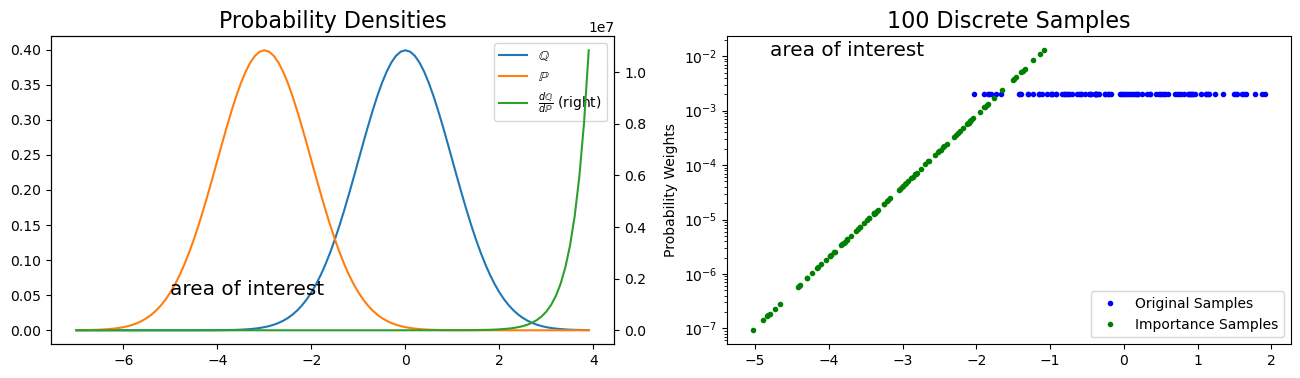

In [25]:
from scipy.stats import norm

x = np.arange(-7, 4, .1)
p = norm.pdf(x)

u = -3 # shift amount
z = np.exp(-u*x + .5*u*u) # dQ/dP

df = pd.DataFrame(np.transpose([norm.pdf(x), norm.pdf(x-u), z]), index=x, 
                  columns=['$\\mathbb{Q}$', '$\\mathbb{P}$', '$\\frac{d \\mathbb{Q}}{d \\mathbb {P}}$'])

fig = plt.figure(figsize=[16, 4])
ax1 = fig.add_subplot(121)

df.plot(ax=ax1, secondary_y=['$\\frac{d \\mathbb{Q}}{d \\mathbb {P}}$']);
ax1.text(-5, .05, "area of interest", size="x-large");
plt.title('Probability Densities', fontsize=16)

plt.subplot(1, 2, 2)

ns = 500
xs_q = np.random.normal(size=[ns]) # Q sample
xs_p = xs_q + u # P sample
qs = 1./ns*np.ones(ns)
zs = np.exp(-u*xs_p + .5*u*u) # R-N derivative
ps = qs*zs

ps = ps/sum(ps)  # normalize

nn = 100
plt.semilogy(xs_q[:nn], qs[:nn], '.b')
plt.semilogy(xs_p[:nn], ps[:nn], '.g')

plt.ylabel('Probability Weights')
plt.legend(['Original Samples', 'Importance Samples'], loc='lower right');
plt.title('100 Discrete Samples', fontsize=16);

plt.text(-4.8, 1e-2, "area of interest", size="x-large");

### Example: One-factor Gaussian copula

The one factor Gaussian copula model is by far the most [infamous](https://www.wired.com/2009/02/wp-quant/) model in quant finance: 

$$\tilde x_i =  \rho^{\frac{1}{2}}\tilde m + ({1-\rho})^{\frac{1}{2}} \tilde \epsilon_i $$

* it is a one factor correlation model, $x_i$ represents asset returns
* $\tilde m, \tilde \epsilon_i$ are all independent standard normal random variables
* $\tilde x_i, \tilde x_j$ are correlated only through the common market factor $\tilde m$: $\cov(\tilde x_i, \tilde x_j) = \rho\;\cov(\tilde m, \tilde m) = \rho$




The one-factor Gaussian copula is often used to model correlated defaults,

1. First draw the normal market factor $m$ and correlated normals $x_i$ for each issuer $i$:

$$\tilde x_i =  \rho^{\frac{1}{2}}\tilde m + ({1-\rho})^{\frac{1}{2}} \tilde \epsilon_i $$

2. If an issuer's survival probability is $p_i(t)$ at time $t$, then we can draw the default
time $\tilde \tau_i$ as:

$$ p_i(\tilde \tau_i) = \Phi(\tilde x_i) \iff \tilde \tau_i = p_i^{-1}(\Phi(\tilde x_i))$$  

3. the corresponding default indicator at time $t$ is: 
$$1_{[\tau_i < t]} = 1_{[\Phi(x_i) > p_i(t)]}$$

The resulting default time $\tau_i$ and default indicators $1_i$ are correlated through $m$

In fact, what is known as the  one–factor Gaussian copula approach in the context of default modeling is misleading. It consists of two steps:
* the application of the Gaussian copula followed by 
* the creation of an additional random variable (an index variable). 

This second step is what creates a problem. 

To properly characterize the credit risk behavior of a pool of assets we need to estimate (and control) two variables: default probability and default correlation.
Default probability is relatively easy to estimate as we can rely on ratings, CDS spreads, fundamental analyses, KMV-like models, etc. The problem with the technique is with the default correlation. First, there are very little data on default correlations (after all, defaults do not happen that often). Second, the data seem to indicate that these correlations are time-dependent. So far nobody has proposed an algorithm to generate default scenarios (assuming you know the default probability and the default correlation). 

Most practitioners have given up on estimating default correlations and have concentrated on correlations exhibited by asset prices (normally called asset correlations) since those data are easy to come by. The secret hope is that asset correlation has something to do with default correlation.

Default times generally look something like:

* Where given a uniform random variable $\tilde u$, the default time is $p^{-1}(\tilde u)$.

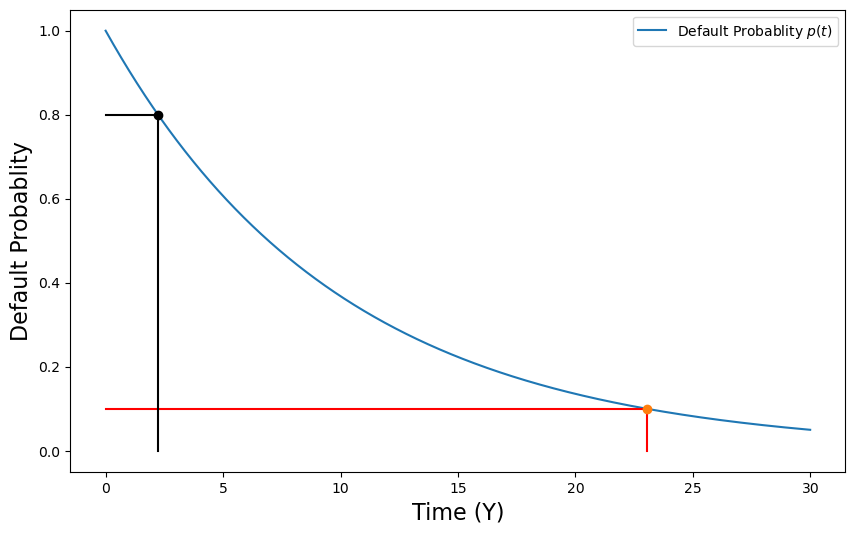

In [2]:
plt.figure(figsize=[10, 6])
ts = np.arange(0, 30, .01)
h = .1
p = np.exp(-h*ts)
plt.plot(ts, p)
plt.xlabel('Time (Y)', fontsize=16)
plt.ylabel('Default Probablity', fontsize=16)

u = 0.1
t = -np.log(u)/h
plt.plot([0, t], [u, u], 'r')
plt.plot([t, t], [0, u], 'r')
plt.plot(t, u, 'o');

u = 0.8
t = -np.log(u)/h
plt.plot([0, t], [u, u], 'k')
plt.plot([t, t], [0, u], 'k')
plt.plot(t, u, 'o', color='k');
plt.legend(['Default Probablity $p(t)$']);

### Example: Incremental risk charge model

IRC is part of the Basel 2.5 capital requirement for credit risk:
* it is defined to be the 1-year 99.9% quantile of the portfolio loss, assuming the portfolio position is held constant
* only captures the default and rating migration; not spread volatility

<img src="equity vs credit.png" width=600></center>
From: Mikael Forsman, "A Model Implementation of Incremental Risk Charge", February, 2012

A *highly* stylized IRC example:
* only consider the default risk, ignore the trade aging
* portfolio: 100 long CDS positions with \$10MM notional each
* 5 names' with a 1-year survival probability of 0.95, the rest of the names have a 1-year survival probability  0.99
* recovery given default is uniform between [10\%, 50\%]
* the correlation of default is governed by the one-factor Gaussian copula with 70\% correlation

<img src="IRC.png" width=800></center>
From: Mikael Forsman, "A Model Implementation of Incremental Risk Charge", February, 2012

### Straight Monte-Carlo for IRC
The IRC can be computed using straight Monte-Carlo:
* generate a large number of PnL scenarios, and simply read the 99.9% quantile
* to estimate the Monte-Carlo error, we have to apply batching (why?)

The straight Monte-Carlo converges slowly:
* only a small percentage of the scenarios hit the 99.9% tail.

In [27]:
nn, rho = 100, 0.7 # nn = number of CDSs ; rho = correlation of default
nsim = 40000
p = 0.99*np.ones(nn) # most have 99% probability of survival
p[:5] = 0.95 # five have a 95% probability of survival
b = 20
lgdl = 5e6 # loss at 50% recovery
lgdh = 9e6 # loss at 10% recovery

# simulation using 1-factor Gaussian copula
def irc0(nsim) : 
    es = np.random.normal(size=[nn+1, nsim])
    xs = np.array([np.sqrt(rho)*es[0, :] + np.sqrt(1-rho)*e for e in es[1:, :]]).T
    lgd = np.random.uniform(lgdl, lgdh, size=nsim)

    pnls = np.sum(np.greater(norm.cdf(xs), p), 1)*lgd
    return np.percentile(pnls, 99.9), pnls

tic = time.time()
ircs0 = [(irc0(nsim))[0] for i in range(b)] # run the simulations
t0 = time.time() - tic

In [28]:
df = pd.DataFrame([nsim, np.mean(ircs0), np.std(ircs0)/np.mean(ircs0), t0/b], index=['paths', 'value', 'rel error', 'run time(s)'], 
                  columns=['IRC'])
display(df.T)    

,paths,value,rel error,run time(s)
IRC,40000.0,4.956617e+08,0.038898,0.30585


### Improving variance by shifting the common factor

A natural variable to shift is the market factor $\tilde m$, can effectively steer the sampling to those scenarios with a lot of defaults:

In [29]:
def irc1(nsim, d) :
    es = np.random.normal(size=[nn+1, nsim])
    xs = np.array([np.sqrt(rho)*(es[0, :] - d) + np.sqrt(1-rho)*e for e in es[1:, :]]).T
    lgd = np.random.uniform(lgdl, lgdh, size=nsim)

    pnls = np.sum(np.greater(norm.cdf(xs), p), 1)*lgd
    ws = (np.exp(d*es[0, :]))/nsim
    
    s_pnls, s_ws = zip(*sorted(zip(pnls, ws)))
    cws = np.cumsum(s_ws/np.sum(s_ws))
    return s_pnls[np.searchsorted(cws, .999)-1], cws, s_pnls

var1 = []
mean1 = []
ds = np.arange(-2.5, 0.1, .25)
for d in ds :
    ircs = [(irc1(nsim, d))[0] for i in range(b)]
    var1.append(np.var(ircs))
    mean1.append(np.mean(ircs))

In [30]:
uo = -1.5

tic = time.time()
ircs1 = [irc1(nsim, uo)[0] for i in range(b)]
t1 = time.time() - tic

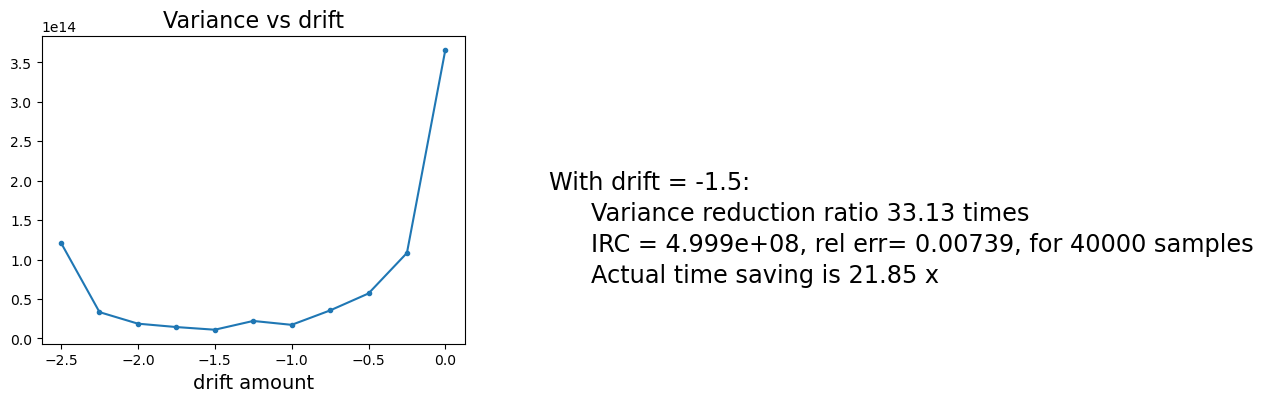

In [31]:
fig = plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(ds, var1, '.-')
plt.xlabel('drift amount', fontsize=14)
plt.title('Variance vs drift', fontsize=16);
ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .5, "With drift = -1.5:", size="xx-large")
ax.text(.1, .4, "Variance reduction ratio %.2f times" % (var1[-1]/min(var1)), size="xx-large");
ax.text(.1, .3, "IRC = %.4g, rel err= %.3g, for %d samples" % (np.mean(ircs1), np.std(ircs1)/np.mean(ircs1), nsim), size="xx-large")
ax.text(.1, .2, "Actual time saving is %.2f x" % (t0/t1*np.var(ircs0)/np.var(ircs1)), size="xx-large");

* a shift of $\tilde m$ around -1.5 gives the most variance reduction
* here we followed the convention that negative $\tilde m$ means to more defaults

### How is the variance reduced?


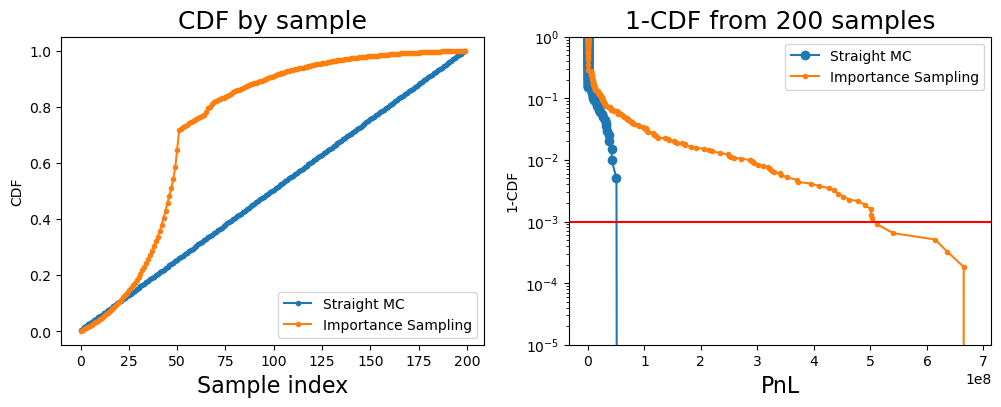

In [32]:
uo = -1.5

nsim = 200
_, pnl1 = irc0(nsim)
_, w2, pnl2 = irc1(nsim, uo)

pnl1 = sorted(pnl1)
w1 = np.arange(1, nsim + 1)*1./nsim

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(np.transpose([w1, w2]), '.-');
plt.title('CDF by sample', fontsize=18)
plt.xlabel('Sample index', fontsize=16)
plt.legend(['Straight MC', 'Importance Sampling'], loc='best')
plt.ylabel('CDF');

plt.subplot(1, 2, 2)
plt.semilogy(pnl1, 1-w1, 'o-')
plt.semilogy(pnl2, 1-w2, '.-')
plt.axhline(1e-3, color='r')
plt.title('100 Samples')
plt.xlabel('PnL', fontsize=16)
plt.ylabel('1-CDF')
plt.title('1-CDF from 200 samples', fontsize=18)
plt.legend(['Straight MC', 'Importance Sampling'], loc='best')
plt.ylim(1e-5, 1);

The Gaussian copula is a simple static model, and it only gives the $\mathcal{F}_0$ distribution of defaults.

What if our model involves a **stochastic process**?

### Equivalent views for IRC

Recall the change of measure for a standard normal rv $\tilde x$ under the $\mathbb Q$ measure:

$$ \small \mathbb E^{\mathbb Q} [f(\tilde x)] = \int_{-\infty}^{\infty} f(x) \phi(x) dx = \int_{-\infty}^{\infty} f(x) \frac{\phi(x)}{\phi(x-d)}\phi(x-d) dx 
= \mathbb E^{\mathbb P}\left[f(\tilde x) \frac{d \mathbb{Q}}{d \mathbb {P}}\right] $$

$$ \small \frac{d \mathbb{Q}}{d \mathbb {P}} =  \exp(-xd + \frac{1}{2}d^2) $$

Alternatively, we could write $\tilde x = \tilde w + d$, where $\tilde w$ is standard normal in $\mathbb P$:

$$\small \mathbb E^{\mathbb Q} [f(\tilde x)] = \mathbb E^{\mathbb P}[f(\tilde x) \frac{d \mathbb{Q}}{d \mathbb {P}}] = \mathbb E^{\mathbb P}[f(\tilde w + d) \frac{d \mathbb{Q}}{d \mathbb {P}}] 
$$

$$ \small \frac{d \mathbb{Q}}{d \mathbb {P}} = \frac{\phi(w+d)}{\phi(w)} = \exp(-wd - \frac{1}{2}d^2) $$

These two expressions are equivalent in representing importance sampling around $d$, leading to something very important -- Girsanov's theorem.

Given a 1-D Brownian $w^{\mathbb P}(t)$ in the $\mathbb P$ measure, and a drifted process $x(t)$:

$$  d x(t) = \theta(t) dt + d w^{\mathbb P} (t)  $$

The process:
$$ m(t) = \exp\left(- \int_0^t \theta(s) d w^{\mathbb P}(s) - \frac{1}{2}\int_0^t \theta^2(s) \; ds \right)$$ 
is a martingale in $\mathbb P$: $\mathbb E^{\mathbb P}[m(t) | \mathcal{F}_s] = m(s) $. 

And then $x(s)$ for $s < t $ is a standard Brownian motion, $w^{\mathbb Q}(t)$, in the measure $\mathbb{Q}$ defined by the Radon-Nikodym derivative $\frac{d \mathbb Q}{d \mathbb P} = m(t)$.

When $\theta(t)$ is a constant: $m(t) = \frac{d \mathbb Q}{d \mathbb P}  = \exp\left(-\theta w^{\mathbb P}(t) - \frac{1}{2} \theta^2t \right) $.

Girsanov in one chart:
<img src=http://upload.wikimedia.org/wikipedia/commons/b/b3/Girsanov.png width=600 height=400>

Visualisation of the Girsanov theorem from [Wikipedia](https://en.wikipedia.org/wiki/Girsanov_theorem) — The left side shows a Wiener process with negative drift under a canonical measure $\mathbb{P}$; on the right side each path of the process is colored according to its likelihood under the martingale measure $\mathbb{Q}$. The density transformation from $\mathbb{P}$ to  $\mathbb{Q}$ is given by the Girsanov theorem.

* sampling an $x(t)$ in $\mathbb P$ is equivalent to sampling an $w^{\mathbb Q}(t)$ in $\mathbb Q$.  
* we can steer $x(t)$ to any arbitrary area of interest in $\mathbb P$
* effective variance reduction for deeply OTM barriers and options
* the $\frac{d \mathbb Q}{d \mathbb P} = m\,(t)$ are per path, convenient for Monte-Carlo


## Low Discrepancy Sequences

Recall that the convergence of Monte Carlo integration is $O\left(n^{\frac{1}{2}}\right)$. It turns out that if we use quasi-random or low discrepancy sequences (which fill space more efficiently than random sequences), we can get convergence approaching $O\left(\frac{1}{n}\right)$. 

*Discrepancy* measures the extent to which the points are evenly dispersed though the space. The more even, the lower the discrepancy. While they are often called quasi-random, they are really not random, but deterministic.

Low discrepancy sequences (LDS) place samples in a methodical and deterministic fashion:
* the whole sample space is evenly covered
* successive addition of sample points leads to uniformly better coverage
* also known as quasi random sequence (QRS)

There are several such generators, but their use in statistical settings is limited to cases where we are integrating with respect to uniform distributions. 
* *e.g.* Sobol sequences and Halton sequences

MC with low discrepancy sequence:
* easy to implement: just replace the uniform random number generator
* variance has to be estimated using batching method

The regularity can also give rise to errors when estimating integrals of periodic functions.

### Consider the coverage of pseudo random samples

Random sampling features obvious holes in the sample coverage, leading to rather slow convergence, proportional to  $ \frac{1}{\sqrt{n}}$

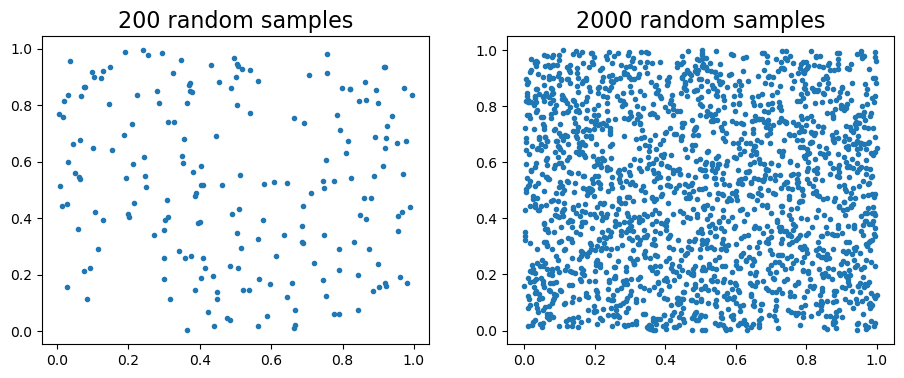

In [33]:
es = np.random.uniform(size=[2, 2000])
plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
n = 200
plt.title('%d random samples' % n, fontsize=16)
plt.plot(es[0,:n], es[1, :n], '.')

plt.subplot(1, 2, 2)
n = 2000
plt.title('%d random samples' % n, fontsize=16)
plt.plot(es[0,:n], es[1, :n], '.');

### Low discrepancy sequences vs Pseudo random sequences

In [34]:
# need to do "pip install sobol_seq"
# !pip install sobol_seq
from sobol_seq import i4_sobol_generate
def sobol(dim, n, skip) :
    s = i4_sobol_generate(dim, n+skip)
    return s[skip:, :].T

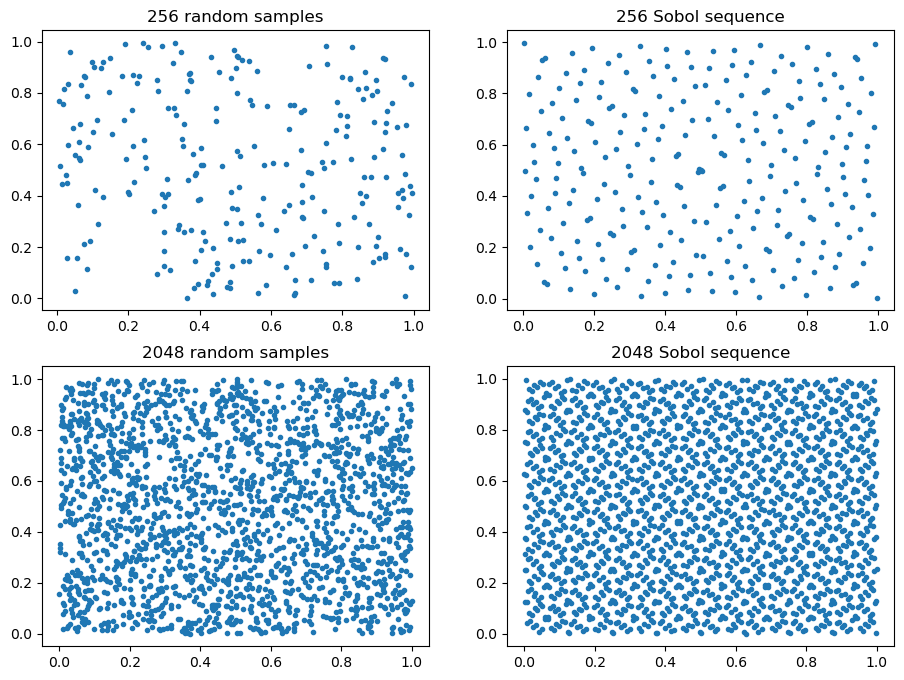

In [35]:
#from sobol_lib import i4_sobol_generate as sobol
x = sobol(2, 5000, 0)

plt.figure(figsize=[11, 8])
plt.subplot(2, 2, 1)
m = 256
plt.plot(es[0, :m], es[1, :m], '.')
plt.title('%d random samples' % m)
plt.subplot(2, 2, 2)
plt.plot(x[0, :m], x[1, :m], '.')
plt.title('%d Sobol sequence' % m)

plt.subplot(2, 2, 3)
m = 2048
plt.plot(es[0, :m], es[1, :m], '.')
plt.title('%d random samples' % m)
plt.subplot(2, 2, 4)
plt.plot(x[0, :m], x[1, :m], '.')
plt.title('%d Sobol sequence' % m);

For the intuition of how a Sobol sequence is generated, consider the following picture for a Brownian bridge:

<img src="sobol brown bridge.png" width=800></center>
From: [Morgan](https://www.broda.co.uk/doc/Morgan_Kucherenko_Wilmott.pdf)

Or, if we look at the first 10 Sobol point in three dimensions:

| First | Second | Third|
|-------|-------|-------|
|0| 0| 0|
|0.5| 0.5| 0.5|
|0.75| 0.25| 0.25|
|0.25| 0.75| 0.75|
|0.375| 0.375| 0.625|
|0.875| 0.875| 0.125|
|0.625| 0.125| 0.875|
|0.125| 0.625| 0.375|
|0.1875| 0.3125| 0.9375|
|0.6875| 0.8125| 0.4375|

From: [Sobol sequence generator](https://web.maths.unsw.edu.au/~fkuo/sobol/)

### Low discrepancy sequences and dimensionality

LDS gives excellent convergence for low to medium number of dimensions:
* popular LDS converges proportional to $\frac{\log^n(d)}{n}$, where $d$ is dimensionality and $n$ is the number of samples.
* much faster than the convergence of random samples which is proportional to $\frac{1}{\sqrt{n}}$


LDS does not work well for very high dimensions:
* The coverage deteriorates when dimensionality > 20

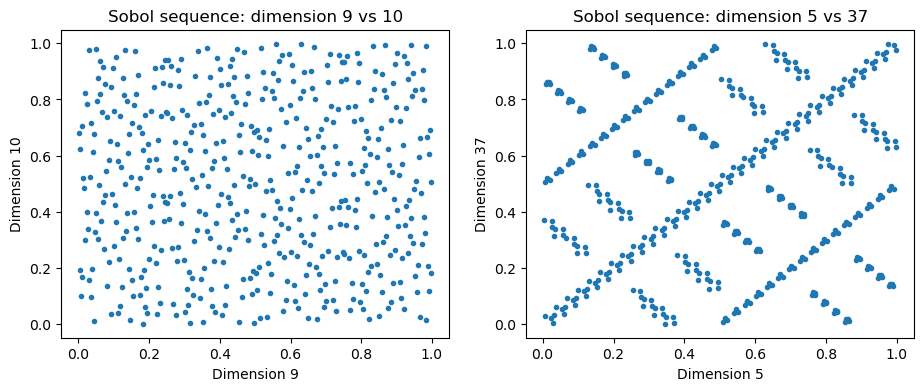

In [36]:
x = sobol(40, 500, 0)

plt.figure(figsize=[11, 4])
plt.subplot(1, 2, 1)
plt.plot(x[8, :], x[9, :], '.')
plt.xlabel('Dimension 9')
plt.ylabel('Dimension 10')
plt.title('Sobol sequence: dimension 9 vs 10')

plt.subplot(1, 2, 2)
plt.plot(x[5,:], x[37, :], '.')
plt.xlabel('Dimension 5')
plt.ylabel('Dimension 37')
plt.title('Sobol sequence: dimension 5 vs 37');

### Common mistakes

Low Discrepancy Sequences are dimension specific
* we have to produce and consume the LDS in the **same** number of dimensions
* we cannot regroup the LDS into different number of dimensions

If we draw 512 numbers from 1-D Sobol sequence, then split them into two groups to cover a two dimensions grid: 

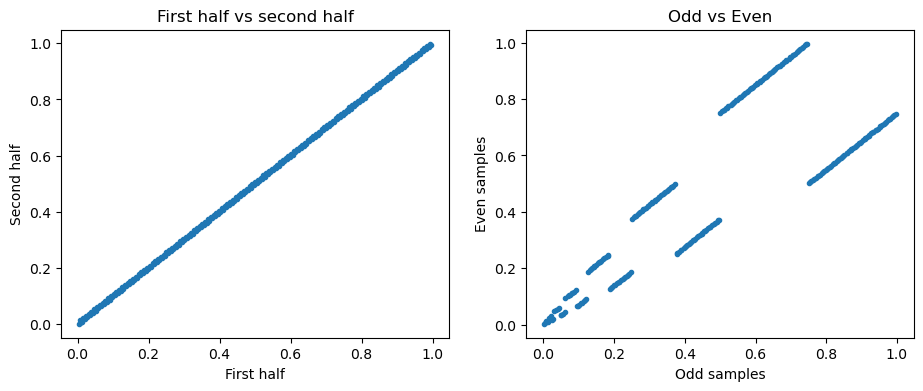

In [37]:
x = sobol(1, 512, 0)[0]
plt.figure(figsize=[11, 4])
plt.subplot(1, 2, 1)
plt.plot(x[:256], x[256:], '.')
plt.xlabel('First half')
plt.ylabel('Second half')
plt.title('First half vs second half')

plt.subplot(1, 2, 2)
plt.plot(x[::2], x[1::2], '.')
plt.xlabel('Odd samples')
plt.ylabel('Even samples')
plt.title('Odd vs Even');

### LDS and Brownian motion

Given an LDS sequence $\hat {d}$, we can use $\Phi^{-1}\left(\hat {d}\right)$ as the normal increments to construct Brownian motions:
* works well for low dimensional problems, *i.e.*  <20
* may be problematic due to poor coverage for higher dimensions

In the Asian option example, 
* there are 12 dimensions for 12 monthly observations
* the variance reduction is about 20-60 times using a Sobol sequence, but it varies with the number of paths

In [38]:
n_paths = 2**15 # number of paths
n_dimensions = 12 # number of dimensions 
n_batches = 20 # number of batches
x0, sigma, t_maturity, dt, r = 100., 0.25, 1., 1./12, 0.02 # set the parameters

# generate the pseudo random sequence using coade from earlier: 
# we can use number of time periods as number of paths
# and number of securities as number of dimensions
z = generate_z_Matrix(n_paths, n_dimensions, seed=42) 

In [39]:
tic = time.time()
u0, e0 = MC_Asian(n_paths, z, x0, r, sigma, dt, t_maturity) # Monte-Carlo for Asian call returning value and error
t0 = time.time() - tic

In [40]:
uss = [] # initialize the path array
u_lds = sobol(n_dimensions, n_batches*n_paths, 0) # generate the Sobol sequence

In [41]:
tic = time.time()
for i in range(n_batches) : # batching to be able to calculate error in LDS
    lds = norm.ppf(u_lds[:, i*n_paths:(i+1)*n_paths]).T # generate normal from the Sobol sequence
    u1, _ = MC_Asian(n_paths, lds, x0, r, sigma, dt, t_maturity) # run Monte-Carlo for Asian call, need only value
    uss.append(u1)
t1 = time.time() - tic

In [42]:
vf = e0*e0/np.var(uss) # ratio of volalities PRS/LDS

df = pd.DataFrame([[n_paths, u0, e0, t0], [n_paths, np.mean(uss), np.std(uss), t1/b]], 
                  index=['PRS', 'LDS'], columns=['Paths', 'Price', 'Error (Std)', 'Time(s)'])

display(df)

,Paths,Price,Error (Std),Time(s)
PRS,32768,6.556349,0.056250,0.007979
LDS,32768,6.577593,0.004462,0.021596


In [43]:
print(f'Variance reduction: {vf:2.4}, Number of batches: {n_batches}')
print(f'Efficiency of PRS: {e0*e0*t0:2.4}')
print(f'Efficiency of LDS: {np.var(uss)*(t1/n_batches):2.4}')

Variance reduction: 158.9, Number of batches: 20
Efficiency of PRS: 2.525e-05
Efficiency of LDS: 4.3e-07


### LDS with Brownian Bridge

In practice we often run into problems with more dimensions than 30,
 * under these situation, LDS could be dangerous.

A useful technique is to use LDS at only at a few key tenors, then use Brownian Bridge to fill in the gaps.

We used a 1-D LDS at the option maturity, the rest is built with Brownian Bridge

In [44]:
ubs = []
lds_bb = norm.ppf(np.array(sobol(1, n_batches*n_paths, 0)[0])+1e-10)*np.sqrt(n_dimensions)
    
tic = time.time()
for i in range(n_batches) :
    es = np.random.normal(size=[n_paths, n_dimensions])
    es_u = np.sum(es, 1)
    d = (lds_bb[i*n_paths:(i+1)*n_paths] - es_u)/n_dimensions
    es_bb = (es.T + d).T

    ubb, ebb = MC_Asian(n_paths, es_bb, x0, r, sigma, dt, t_maturity)
    ubs.append(ubb)
t2 = time.time() - tic

vf = e0*e0/np.var(ubs)

In [45]:
df = pd.DataFrame([[n_paths, u0, e0, t0], [n_paths, np.mean(ubs), np.std(ubs), t2/n_batches]], 
                  index=['PRS', 'LDS with BB'], columns=['Paths', 'Price', 'Error (Std)', 'Time(s)'])

display(df)

,Paths,Price,Error (Std),Time(s)
PRS,32768,6.556349,0.056250,0.007979
LDS with BB,32768,6.566999,0.026936,0.014606


A modest variance reduction is achieved in the Asian option example
* more reduction is expected if we sample multiple time steps with LDS

# Other Techniques

## Moment matching

Shift and scale the random samples so that they have the desired moments -- in other words, force the empirical moments to match the theoretical moments.
 * often applied to normal random numbers
 * has limited variance reduction

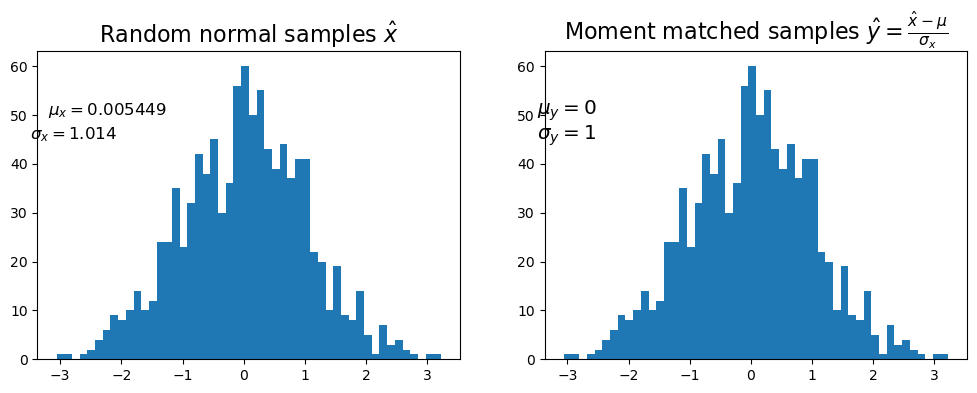

In [46]:
x = np.random.normal(size = 1000)
u = np.mean(x)
vol = np.std(x)
y = (x-u)/vol

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.hist(x, 50);

plt.text(-3.2, 50, '$\\mu_x=%.4g$' % np.mean(x), size='large');
plt.text(-3.5, 45, '$\\sigma_x=%.4g$' % np.std(x), size='large');
plt.title('Random normal samples $\\hat x$', fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(x, 50)
plt.text(-3.5, 50, '$\\mu_y=0$', size='x-large');
plt.text(-3.5, 45, '$\\sigma_y=1$', size='x-large');
plt.title('Moment matched samples $\\hat y = \\frac{\\hat x - \\mu}{\\sigma_x}$', fontsize=16);

## Stratification

Stratification is essentially bucketing, in order to better capture the true distribution, similar to moment matching, it attempts to force empirical probabilities to  match theoretical probabilities.

Consider drawing uniform random numbers in 1-D:
* divide the range [0, 1] into $n$ buckets (or strata), each with length $\frac{1}{n}$
* map the uniform to each bucket in a round robin manner: 

$$\hat v_i = \frac{(i \mod n) + \hat u_i}{n}$$

* $\hat v_i$ are stratified samples, and it can be converted to other distributions using inverse CDF





Stratification is similar to LDS in spirit, but:
* more difficulty in extending to higher dimensions, the number of strata explodes with dimensions
* less popular than LDS in practice

In [47]:
def stratify(u, bs, shuffle) :
    b = len(bs)
    r = len(u)//b + 1
    sb = []
    
    for i in range(r) :
        if shuffle :
            np.random.shuffle(bs)
        sb = sb + bs.tolist()
            
    return [1.*(i + x)/b for x, i in zip(u, sb)]

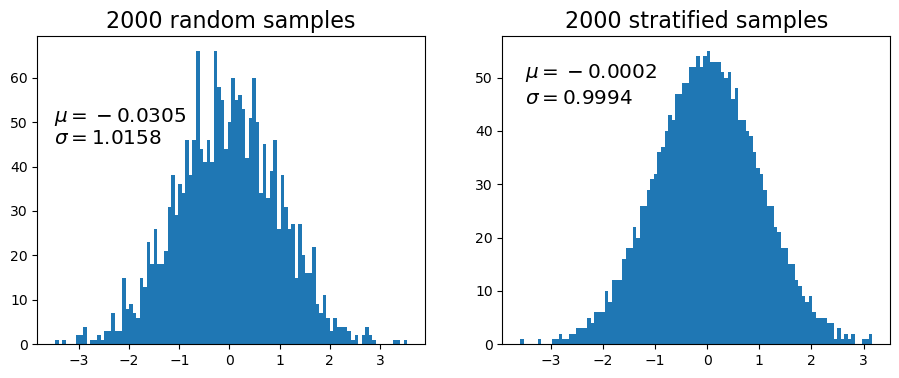

In [48]:
bs = np.arange(1000)
n = 2000
u = np.random.uniform(size=n)
v = stratify(u, bs, False)

plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.title('%d random samples' % n, fontsize=16)
x = norm.ppf(u)
plt.hist(x, 100);
plt.text(-3.5, 50, '$\\mu=%.4f$' % np.mean(x), size='x-large');
plt.text(-3.5, 45, '$\\sigma=%.4f$' % np.std(x), size='x-large');

plt.subplot(1, 2, 2)
plt.title('%d stratified samples' % n, fontsize=16)
y = norm.ppf(v)
plt.hist(y, 100);
plt.text(-3.5, 50, '$\\mu=%.4f$' % np.mean(y), size='x-large');
plt.text(-3.5, 45, '$\\sigma=%.4f$' % np.std(y), size='x-large');

## Practical matters in variance reduction

**Important**: Different methods do not mix well.
  * combining two methods together do not necessarily yield more variance reduction, 
  * it often messes things up

Many these variance reduction methods can be viewed as a set of methods to introduce additional levels of regularity in inputs at the expense of complicating the estimation errors. Monte-Carlo is completely random (or at least as random as the random number generator) and low-discrepancy methods are completely deterministic.
  

Do not abuse methods that are easy to implement, such as antithetic variate and LDS:
  * Control variate and importance sampling deserve the most attention
  
If you are performing a one-time calculation, simple Monte Carlo is appealing.
However, if you are performing a Monte Carlo valuation repeatedly, you may achieve large efficiency gains by analyzing the problem and using one or more variance reduction
techniques to increase efficiency.

## Summary of methods to improve Monte Carlo

<small>

| Methods | Effectiveness | Generality | Batching? | Implementation | Best for |
| :---: | :---: | :---: | :---: | :---: | :---: |
| Antithetic Variate | low | high | no | easy | linearish payoffs |
| Control Variate | very high | low | no | hard | has vanila proxy |
| Importance Sampling | high | low | yes | hard | rare events | 
| Low Discrepency Sequence | vary | high | yes | easy | low dimensionality |
| Moment Matching | low | high | yes | easy | ?? |
| Stratified Sampling | vary | low | yes | easy | low dimensionality |

# References

* Andersen and Piterbarg "Interest Rate Modeling", Atlantic Financial Press.
* Boyle, "Options: A Monte Carlo Approach", *Journal of Financial Economics*, 4 (1977) 323-338.
* Boyle *et. al.*, "Monte Carlo Methods for Security Pricing", *Journal of Economic Dynamics and Control*, 21:8-9 (1997) 1267-1321.
* Boyle and Tan, "Applications of Randomized Low Discrepancy Sequences to the Valuation of Complex Securities", *Journal of Economic Dynamics and Control*, 24 (2000) 1747-1782.
* Glasserman, "Monte Carlo Methods in Financial Engineering", Springer.
* McDonald, "Derivative Markets", Pearson.
* McLeish, "Monte Carlo Simulation & Finance", Wiley.
